In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [10]:
df = pd.read_csv('trace_data/trace_df.csv', index_col=0)
pd.options.display.max_columns = None
display(df)

,reg_method,weight,loss,forget_rate,xQf,alpha,xQr,correlated_update,perseveration_bias,xH,beta,sindy_beta
0,2nd_approach,0.000000,0.763634,0.0,1.137 xQf[k],0.25,0.759 xQr[k] + 0.090 cr[k],False,0.0,1.011 xH[k],3.0,5.572883
1,2nd_approach,0.000010,0.560909,0.0,1.008 xQf[k],0.25,0.122 1 + 0.835 xQr[k] + 0.041 cr[k],False,0.0,1.003 xH[k],3.0,10.260239
2,2nd_approach,0.000013,0.592642,0.0,0.946 xQf[k],0.25,0.772 xQr[k] + 0.062 cr[k],False,0.0,1.005 xH[k],3.0,7.531583
3,2nd_approach,0.000018,0.563549,0.0,1.004 xQf[k],0.25,0.081 1 + 0.841 xQr[k] + 0.077 cr[k],False,0.0,1.012 xH[k],3.0,6.643495
4,2nd_approach,0.000023,0.583949,0.0,0.987 xQf[k],0.25,0.866 xQr[k] + 0.140 cr[k],False,0.0,1.018 xH[k],3.0,3.500967
5,2nd_approach,0.000031,0.597238,0.0,0.977 xQf[k],0.25,0.040 1 + 0.823 xQr[k] + 0.087 cr[k],False,0.0,0.998 xH[k],3.0,5.244750
6,2nd_approach,0.000041,0.624108,0.0,1.004 xQf[k],0.25,0.054 1 + 0.825 xQr[k] + 0.049 cr[k],False,0.0,0.998 xH[k],3.0,8.122942
7,2nd_approach,0.000054,0.585237,0.0,0.951 xQf[k],0.25,0.039 1 + 0.816 xQr[k] + 0.112 cr[k],False,0.0,0.997 xH[k],3.0,3.174993
8,2nd_approach,0.000072,0.556565,0.0,0.983 xQf[k],0.25,0.069 1 + 0.786 xQr[k] + 0.146 cr[k],False,0.0,1.000 xH[k],3.0,3.386137
9,2nd_approach,0.000095,0.591344,0.0,0.977 xQf[k],0.25,0.067 1 + 0.792 xQr[k] + 0.140 cr[k],False,0.0,0.994 xH[k],3.0,3.087974


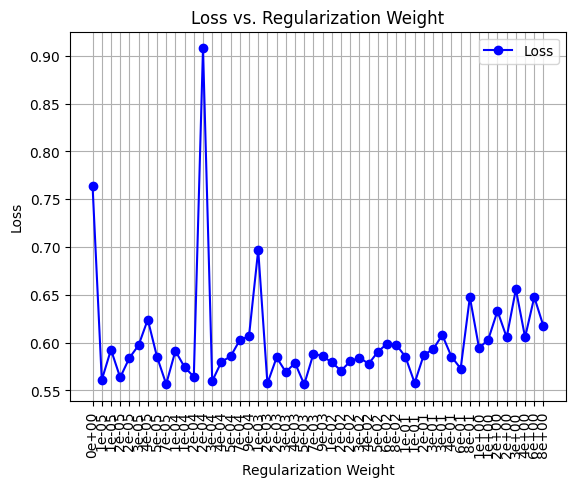

In [23]:
def scientific_format(x, pos):
    return f'{x:.0e}'

# Create a formatter
formatter = FuncFormatter(scientific_format)

# Plot using indices for equal spacing
indices = range(len(df))
plt.plot(indices, df['loss'], label='Loss', color='blue', marker='o', linestyle='-')

# Set x-ticks to the indices and labels to the original weights with scientific notation and smaller font size
plt.xticks(indices, [scientific_format(x, None) for x in df['weight']], rotation='vertical', fontsize=10)

# Add titles and labels
plt.title('Loss vs. Regularization Weight')
plt.xlabel('Regularization Weight')
plt.ylabel('Loss')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()